<a href="https://colab.research.google.com/github/gourab-sinha/Machine_Learning/blob/master/Linear%20Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Builtin

In [0]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import pandas as pd
import numpy as np

In [0]:
data = np.loadtxt('data.csv',delimiter=',')
X = data[:,0].reshape(-1,1)
Y = data[:,1]

In [0]:
X_train,X_test, Y_train,Y_test = model_selection.train_test_split(X,Y)
# print(len(X_train))
alg1 = LinearRegression()
alg1.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
alg1.coef_ # m value

array([1.23179465])

In [0]:
alg1.intercept_ # c value , equation y = mx + c

12.087443109068715

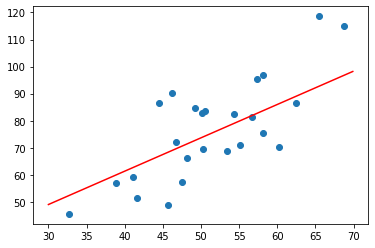

In [0]:
import matplotlib.pyplot as plt
m = alg1.coef_
c = alg1.intercept_
x_line = np.arange(30,70,0.1)
y_line = m*x_line + c
train_d1 = X_test.reshape(25)
plt.plot(x_line,y_line,"r")
plt.scatter(X_test,Y_test)
plt.show()

In [0]:
score_test = alg1.score(X_test,Y_test)
print(score_test)
score_train = alg1.score(X_train,Y_train)
print(score_train)

0.543232536921533
0.6074988591174282


In [0]:
a = [0.4*0.4,0.2*0.2,0.8*0.8,1.3*1.3,0.7*0.7]
total = 0
for i in a:
  total+=i
total

3.02

# Linear Regression Own Model

In [0]:
data = np.loadtxt('data.csv',delimiter=',')
X = data[:,0]
Y = data[:,1]
X_train,X_test, Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.3)
class LinearRegressionModel:
  # M,C values
  def fit(self,X_train,Y_train):
    num = (X_train*Y_train).mean() - X_train.mean()*Y_train.mean()
    denum = (X_train**2).mean() - X_train.mean()**2
    m = num/denum
    c = Y_train.mean()-m*X_train.mean()
    return m,c

  # Predict
  def pred(self,X_test,m,c):
    return m*X_test+c
  
  # Score
  def score(self,Y_test,Y_pred):
    u = ((Y_test-Y_pred)**2).sum()
    v = ((Y_test-Y_test.mean())**2).sum()
    return 1-u/v

  # Cost to train
  def cost(self,X,Y,m,c):
    return ((Y-m*X-c)**2).mean()



In [94]:
linear_regression = LinearRegressionModel()
m,c = linear_regression.fit(X_train,Y_train)
# Predicted test 
Y_pred = linear_regression.pred(X_test,m,c)

# Test Score
test_score = linear_regression.score(Y_test,Y_pred)

# Predicted train
Y_pred_train = linear_regression.pred(X_train,m,c)

# Train score
train_score = linear_regression.score(Y_train,Y_pred_train)

# test data
y_test_pred = linear_regression.pred(X_test, m, c)
print("Test Score: ",test_score)

# Training Score
print("Train Score: ",train_score)

# Training Cost
print("Training Cost: ",linear_regression.cost(X_train,Y_train,m,c))

# M, C
print("M, C ",m,c)



Test Score:  0.49732165174109855
Train Score:  0.6089316845016236
Training Cost:  121.07812406550072
M, C  1.3441845395678818 7.741173337456374
